In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import clear_output, display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

from sklearn.mixture import GaussianMixture

Number of example in dataset: 150
Number of features          : 4
Number of clusters          : 3


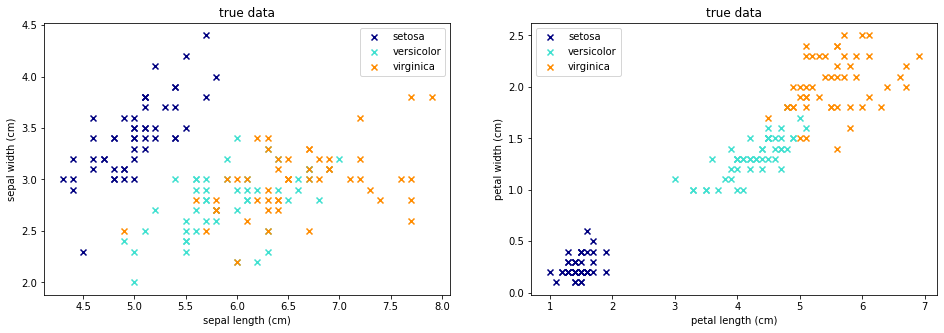

In [2]:
# Get the iris dataset (but we'll use it without target for unsupervised learning tasks)
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print("Number of example in dataset: {}".format(X.shape[0]))
print("Number of features          : {}".format(X.shape[1]))

# Define the number of clusters as the number of unique values in Y
n_clusters = len(np.unique(Y))
print("Number of clusters          : {}".format(n_clusters))

# Plot dataset
colors = ['navy', 'turquoise', 'darkorange']
plt.rcParams['figure.figsize'] = [16, 5]
fig, ax = plt.subplots(1,2)
for n, color in enumerate(colors):
    data = X[Y == n]
    ax[0].scatter(data[:, 0], data[:, 1], marker='x', color=color,label=iris.target_names[n])   
    ax[1].scatter(data[:, 2], data[:, 3], marker='x', color=color,label=iris.target_names[n])
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].set_xlabel(iris.feature_names[2])
ax[1].set_ylabel(iris.feature_names[3])
ax[0].set_title('true data')
ax[1].set_title('true data')
plt.plot();

In [3]:
# Normalise the data
min_max_scaler = MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X)

K-means:
init: k-means++
K-means inertia: 78.851441426146


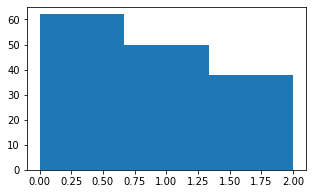

In [4]:
# Prepare K-means algorithm
print("K-means:")
print("init: k-means++")

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10).fit(X)
print("K-means inertia: " + str(kmeans.inertia_))
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
plt.rcParams['figure.figsize'] = [5, 3]
plt.hist(labels,bins=n_clusters);

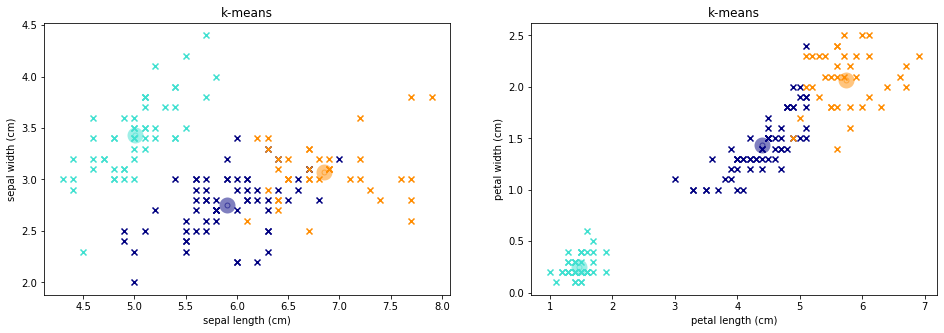

In [5]:
# Plot identified clusters
plt.rcParams['figure.figsize'] = [16, 5]
fig, ax = plt.subplots(1,2)
for n, color in enumerate(colors):
    data = X[labels == n]
    ax[0].scatter(data[:, 0], data[:, 1], marker='x', color=color)   
    ax[0].scatter(clusters[n, 0], clusters[n, 1], marker='o', color=color,linewidths=10,alpha=0.5)
    ax[1].scatter(data[:, 2], data[:, 3], marker='x', color=color)   
    ax[1].scatter(clusters[n, 2], clusters[n, 3], marker='o', color=color,linewidths=10,alpha=0.5)
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].set_xlabel(iris.feature_names[2])
ax[1].set_ylabel(iris.feature_names[3])
ax[0].set_title('k-means')
ax[1].set_title('k-means')
plt.plot();

Mean Shift:
number of estimated clusters : 13


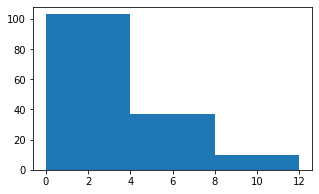

In [6]:
# Test Mean Shift
print("Mean Shift:")

# Estimate the bandwitch according to a definite quantile
bandwidth = estimate_bandwidth(X, quantile=0.06)

# Configure Mean Shift algorithm and fit to data
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)

labels = ms.labels_
clusters = ms.cluster_centers_
print("number of estimated clusters : %d" % len(np.unique(labels)))

plt.rcParams['figure.figsize'] = [5, 3]
plt.hist(labels,bins=n_clusters);

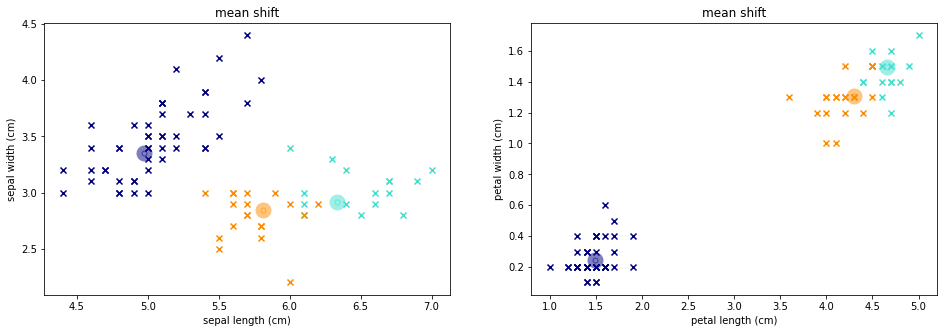

In [7]:
# Plot identified clusters
plt.rcParams['figure.figsize'] = [16, 5]
fig, ax = plt.subplots(1,2)
for n, color in enumerate(colors):
    data = X[labels == n]
    ax[0].scatter(data[:, 0], data[:, 1], marker='x', color=color)   
    ax[0].scatter(clusters[n, 0], clusters[n, 1], marker='o', color=color,linewidths=10,alpha=0.5)
    ax[1].scatter(data[:, 2], data[:, 3], marker='x', color=color)   
    ax[1].scatter(clusters[n, 2], clusters[n, 3], marker='o', color=color,linewidths=10,alpha=0.5)
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].set_xlabel(iris.feature_names[2])
ax[1].set_ylabel(iris.feature_names[3])
ax[0].set_title('mean shift')
ax[1].set_title('mean shift')
plt.plot();

Gaussian Mixture Models:


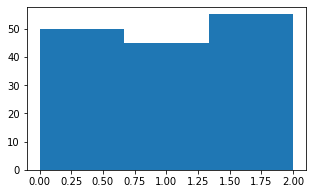

In [8]:
# Test Gaussian Mixture Models
print("Gaussian Mixture Models:")

# Configure Mean Shift algorithm and fit to data
gmm = GaussianMixture(n_components=3,covariance_type='full', max_iter=20, random_state=0).fit(X)

# Make predictions
labels = gmm.predict(X)

plt.rcParams['figure.figsize'] = [5, 3]
plt.hist(labels,bins=n_clusters);

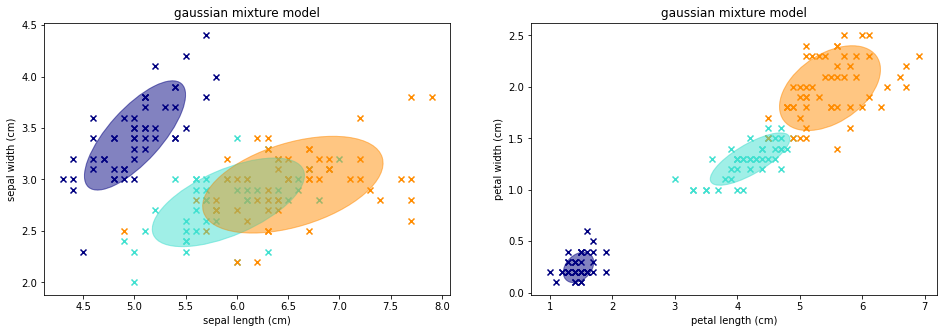

In [9]:
# Plot identified clusters

def make_ellipses(gmm, ax, features):
    for n, color in enumerate(colors):
        if features == 0:
            covariances = gmm.covariances_[n][:2, :2]
        else:
            covariances = gmm.covariances_[n][2:, 2:]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        if features == 0:
            ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                      180 + angle, color=color)
        else:
            ell = mpl.patches.Ellipse(gmm.means_[n, 2:], v[0], v[1],
                                      180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.2)
        ax.add_artist(ell)
        
plt.rcParams['figure.figsize'] = [16, 5]
fig, ax = plt.subplots(1,2)
for n, color in enumerate(colors):
    data = X[labels == n]
    ax[0].scatter(data[:, 0], data[:, 1], marker='x', color=color)   
    #ax[0].scatter(clusters[n, 0], clusters[n, 1], marker='o', color=color,linewidths=10,alpha=0.5)
    make_ellipses(gmm, ax[0],0)
    ax[1].scatter(data[:, 2], data[:, 3], marker='x', color=color)   
    #ax[1].scatter(clusters[n, 2], clusters[n, 3], marker='o', color=color,linewidths=10,alpha=0.5)
    make_ellipses(gmm, ax[1],1)
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].set_xlabel(iris.feature_names[2])
ax[1].set_ylabel(iris.feature_names[3])
ax[0].set_title('gaussian mixture model')
ax[1].set_title('gaussian mixture model')
plt.plot();